## Logistic regression

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = sio.loadmat("spamdata.mat")
xtrain = data['xtrain']
ytrain = data['ytrain']
xtest = data['xtest']
ytest = data['ytest']

## Normalising data and adding bias

In [3]:
mu = xtrain.mean(axis = 0)
std = xtrain.std(axis = 0)
xtrain = (xtrain - mu) / std
xtest = (xtest - mu) / std
xtrain = np.insert(xtrain,0,1,axis=1)
xtest = np.insert(xtest,0,1,axis=1)

## Cost Function
L(u) = $log(1 + e^u) − u$ <br>
u = $y(W^Tx + b)$

In [4]:
def cost1(x,y,w):
    u = (y * x @ w < 0 ) * (x @ w)
    return (u).mean()   

In [5]:
def cost(x,y,w):
    u = y * x @ w
    return (np.log(1 + np.exp(u)) - u).mean()   

In [6]:
def train(x, y, alpha, gamma, iterations = 2000):
    np.random.seed(2)
    w = np.random.randn(xtrain.shape[1],1) / 10000
    cost_list = []
    for i in range(iterations):
        u = y * x @ w
        grad = (( -1 / (1 + np.exp(u)) ) * y * x).mean(axis=0).reshape(-1,1) + 2 * gamma * w
        w = w - alpha * grad
        cost_list.append(cost1(x,y,w))
    return cost_list, w

In [7]:
cost_list, w = train(xtrain,ytrain,alpha=0.01,gamma=0.1)

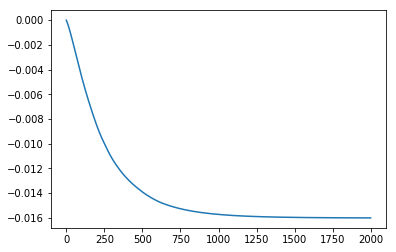

In [8]:
plt.plot(cost_list)

In [9]:
error = np.abs((xtrain @ w > 0)* 1 - (ytrain > 0)).mean()
acc = 1- error
print("Accuracy = {}% \nError \t = {}%".format(acc*100,error*100))

Accuracy = 90.8% 
Error 	 = 9.2%


In [10]:
error = np.abs((xtest @ w > 0)* 1 - (ytest > 0)).mean()
acc = 1- error
print("Accuracy = {}% \nError \t = {}%".format(acc*100,error*100))

Accuracy = 90.10000000000001% 
Error 	 = 9.9%
